# GMM ON DUMMY DATASET MAKE_BLOB

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_blobs
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline

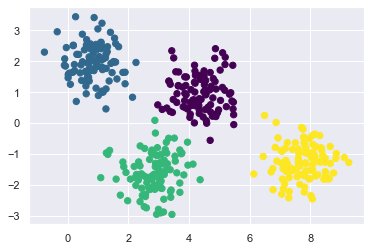

In [8]:
# generating data
x, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
x = x[:, ::-1]
plt.scatter(x[:, 0], x[:, 1], c = y_true, s = 40, cmap = "viridis")
plt.show()

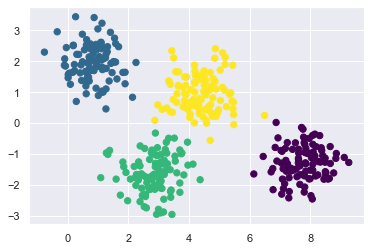

In [9]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components = 4).fit(x)
labels = gmm.predict(x)
plt.scatter(x[:, 0], x[:, 1], c = labels, s = 40, cmap = "viridis")
plt.show()

In [19]:
probs = gmm.predict_proba(x)
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, **kwargs):
    ax = plt.gca()
    if covariance.shape == (2,2):
        u, s, vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(u[1, 0], u[0, 0]))
        width, height = 2*np.sqrt(s)
    else:
        angle = 0
        width, height = 2*np.sqrt(covariance)
    for n in range(1, 4):
        ax.add_patch(Ellipse(position, n*width, n*height, angle, **kwargs))

In [20]:
def plot_gmm(gmm, x, label=True):
    ax = plt.gca()
    labels = gmm.fit(x).predict(x)
    if label:
        ax.scatter(x[:, 0], x[:, 1], c = labels, s = 40, cmap = "viridis", zorder = 2)
    else:
        ax.scatter(x[:, 0], x[:, 1], s = 40, zorder = 2)
    ax.axis("equal")
    w_factor = 0.2/gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha = w*w_factor)

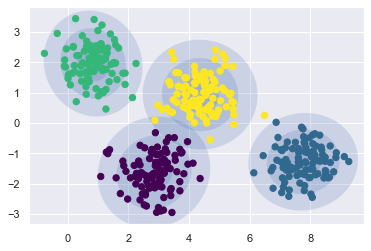

In [21]:
gmn = GMM(n_components = 4, covariance_type = "full", random_state = 42)
plot_gmm(gmm, x)

# GMM ON GIVEN DATASET

In [22]:
import pandas as pd
data = pd.read_excel("Clustering_gmm.xlsx")
print(data.head())

      Weight      Height
0  67.062924  176.086355
1  68.804094  178.388669
2  60.930863  170.284496
3  59.733843  168.691992
4  65.431230  173.763679


In [35]:
x = data.values
#print(x)
y = data.columns.values
print(y)

['Weight' 'Height']


# THEN DOING ALL THE SAME CONCEPTS AND METHODS THAT ARE USED ABOVE WITH MAKE_BLOBS DATASET.
# HERE X WILL BE THE VALUES AND Y WILL BE THE COLUMN NAMES i.e WEIGHT AND HEIGHT AND WE WILL GET 2 CLUSTERS 